<a href="https://colab.research.google.com/github/Kai0ult/Trabalho_2_Estudo_de_Caso_Aprendizado_de_Maquina/blob/main/Trabalho_2_Estudo_de_Caso_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [ ]:
# Carregando Dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_data_preprocessed.csv')
data.head(10)

,study_hours_per_day,attendance_percentage,exam_score
0,0.0,85.0,56.2
1,6.9,97.3,100.0
2,1.4,94.8,34.3
3,1.0,71.0,26.8
4,5.0,90.9,66.4
5,7.2,82.9,100.0
6,5.6,85.8,89.8
7,4.3,77.7,72.6
8,4.4,100.0,78.9
9,4.8,95.4,100.0


In [ ]:
data.shape

(1000, 3)

**KNN(K-Nearest Neighbors)**

Distribuição das classes:
exam_score_acima_50
1    869
0    131
Name: count, dtype: int64

Proporção percentual:
exam_score_acima_50
1    86.9
0    13.1
Name: proportion, dtype: float64

Distribuição das classes após balanceamento (SMOTE):
[0 1] [608 608]


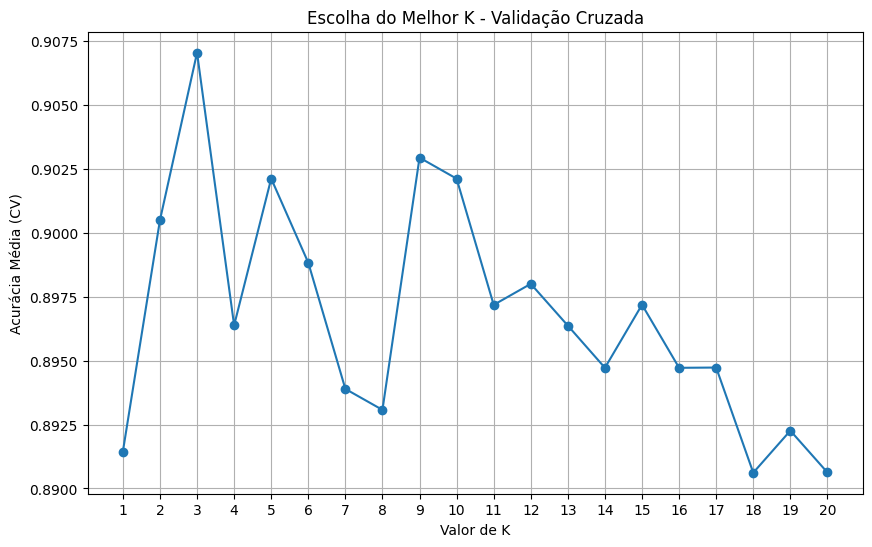


Melhor valor de K: 3 com acurácia média de 0.9070

Avaliação do KNN:
Confusion Matrix:
[[ 22  17]
 [ 47 214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.56      0.41        39
           1       0.93      0.82      0.87       261

    accuracy                           0.79       300
   macro avg       0.62      0.69      0.64       300
weighted avg       0.85      0.79      0.81       300


Accuracy Score:
0.7866666666666666


<Figure size 1000x600 with 0 Axes>

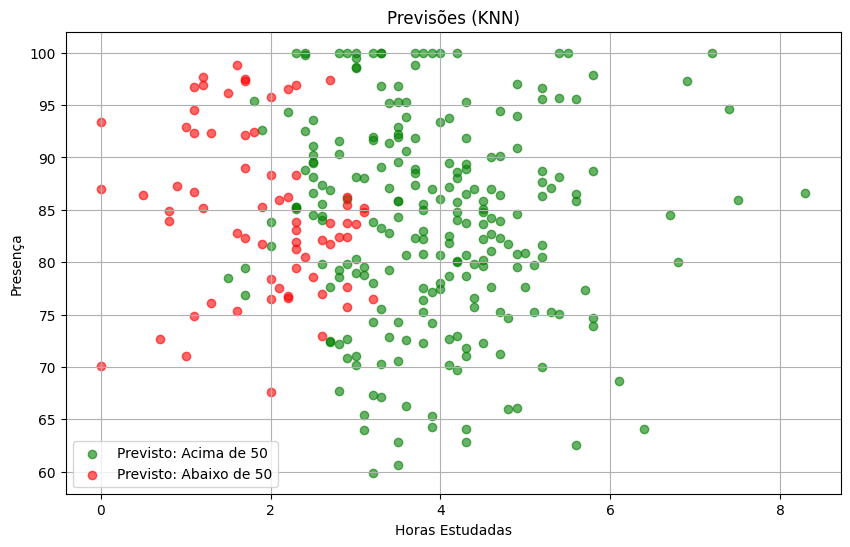

In [ ]:
#Criar variável binária
data['exam_score_acima_50'] = (data['exam_score'] > 50).astype(int)

#Verificando balanceamento
print("Distribuição das classes:")
print(data['exam_score_acima_50'].value_counts())
print("\nProporção percentual:")
print(data['exam_score_acima_50'].value_counts(normalize=True) * 100)

#Separando X e y
X = data.drop(['exam_score', 'exam_score_acima_50'], axis=1)
y = data['exam_score_acima_50']

#Dividindo os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Normalização
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

#Balanceamento dos dados com SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("\nDistribuição das classes após balanceamento (SMOTE):")
unique, counts = np.unique(y_train_bal, return_counts=True)
print(unique, counts)

#Encontrar o melhor k com validação cruzada
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_bal, y_train_bal, cv=5, scoring='accuracy')
    scores.append(cv_scores.mean())

#Plotando resultados do melhor k
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia Média (CV)')
plt.title('Escolha do Melhor K - Validação Cruzada')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#Selecionando o melhor k
best_k = k_range[np.argmax(scores)]
print(f"\nMelhor valor de K: {best_k} com acurácia média de {max(scores):.4f}")

#Treinando modelo com melhor k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_bal, y_train_bal)

#Fazendo previsões
y_pred_knn = knn.predict(X_test_scaled)

#Avaliando modelo
print("\nAvaliação do KNN:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_knn))

#Plotando os dados do modelo
plt.figure(figsize=(10, 6))

X_vis = X_test[['study_hours_per_day', 'attendance_percentage']].values
X_vis_scaled = scaler2.transform(X_test[['study_hours_per_day', 'attendance_percentage']])
y_pred_knn_vis = knn.predict(X_vis_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_vis[y_pred_knn_vis == 1][:, 0], X_vis[y_pred_knn_vis == 1][:, 1],
            color='green', label='Previsto: Acima de 50', alpha=0.6)
plt.scatter(X_vis[y_pred_knn_vis == 0][:, 0], X_vis[y_pred_knn_vis == 0][:, 1],
            color='red', label='Previsto: Abaixo de 50', alpha=0.6)

plt.xlabel('Horas Estudadas')
plt.ylabel('Presença')
plt.title('Previsões (KNN)')
plt.legend()
plt.grid(True)
plt.show()

**Maquina de Vetor de Suporte(SVM)**

Distribuição das classes:
exam_score_acima_50
1    869
0    131
Name: count, dtype: int64

Proporção percentual:
exam_score_acima_50
1    86.9
0    13.1
Name: proportion, dtype: float64

Distribuição das classes após balanceamento (SMOTE):
[0 1] [608 608]

Avaliação do SVM:
Confusion Matrix:
[[ 34   5]
 [ 54 207]]

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.87      0.54        39
           1       0.98      0.79      0.88       261

    accuracy                           0.80       300
   macro avg       0.68      0.83      0.71       300
weighted avg       0.90      0.80      0.83       300


Accuracy Score:
0.8033333333333333


<Figure size 1000x600 with 0 Axes>

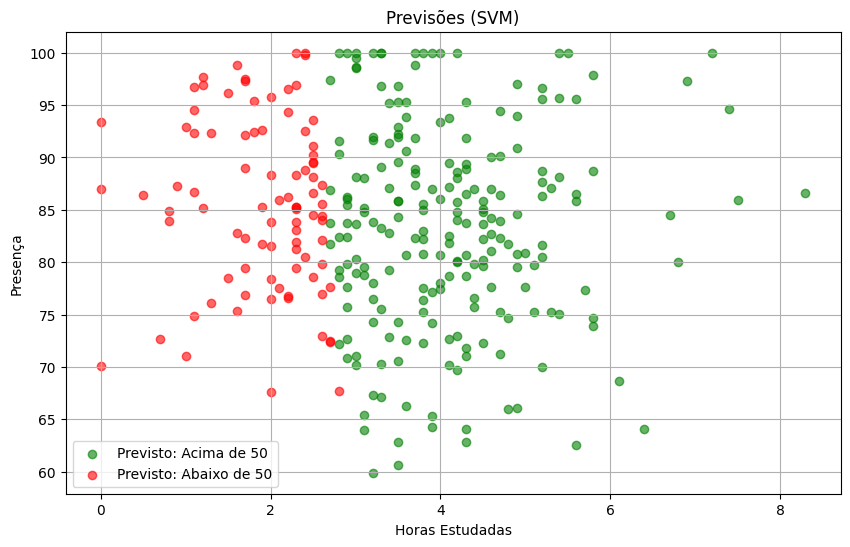

In [ ]:
#Criar variável binária
data['exam_score_acima_50'] = (data['exam_score'] > 50).astype(int)

#Verificando balanceamento
print("Distribuição das classes:")
print(data['exam_score_acima_50'].value_counts())
print("\nProporção percentual:")
print(data['exam_score_acima_50'].value_counts(normalize=True) * 100)

#Separando X e y
X = data.drop(['exam_score', 'exam_score_acima_50'], axis=1)
y = data['exam_score_acima_50']

#Dividindo os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Normalização
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

#Balanceamento dos dados com SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("\nDistribuição das classes após balanceamento (SMOTE):")
unique, counts = np.unique(y_train_bal, return_counts=True)
print(unique, counts)

#Treinando modelo SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_bal, y_train_bal)

#Fazendo previsões
y_pred_svm = svm.predict(X_test_scaled)

#Avaliando modelo
print("\nAvaliação do SVM:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svm))

#Plotando os dados do modelo e o hiperplano
plt.figure(figsize=(10, 6))

X_vis = X_test[['study_hours_per_day', 'attendance_percentage']].values
X_vis_scaled = scaler2.transform(X_test[['study_hours_per_day', 'attendance_percentage']])
y_pred_svm_vis = svm.predict(X_vis_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_vis[y_pred_svm_vis == 1][:, 0], X_vis[y_pred_svm_vis == 1][:, 1],
            color='green', label='Previsto: Acima de 50', alpha=0.6)
plt.scatter(X_vis[y_pred_svm_vis == 0][:, 0], X_vis[y_pred_svm_vis == 0][:, 1],
            color='red', label='Previsto: Abaixo de 50', alpha=0.6)

plt.xlabel('Horas Estudadas')
plt.ylabel('Presença')
plt.title('Previsões (SVM)')
plt.legend()
plt.grid(True)
plt.show()

**Random Forest**

Distribuição das classes:
exam_score_acima_50
1    869
0    131
Name: count, dtype: int64

Proporção percentual:
exam_score_acima_50
1    86.9
0    13.1
Name: proportion, dtype: float64

Distribuição das classes após balanceamento (SMOTE):
[0 1] [608 608]

Avaliação do Random Forest:
Confusion Matrix:
[[ 19  20]
 [ 37 224]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.49      0.40        39
           1       0.92      0.86      0.89       261

    accuracy                           0.81       300
   macro avg       0.63      0.67      0.64       300
weighted avg       0.84      0.81      0.82       300


Accuracy Score:
0.81


<Figure size 1000x600 with 0 Axes>

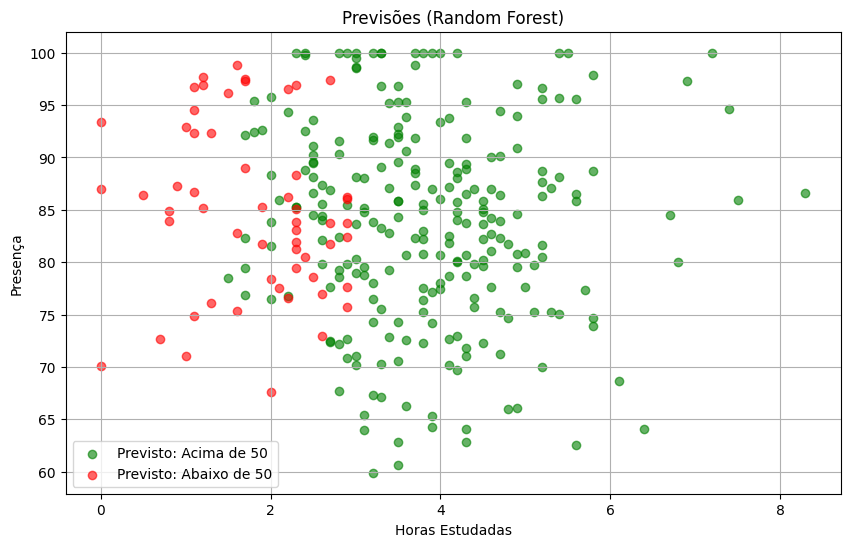

In [ ]:
#Criar variável binária
data['exam_score_acima_50'] = (data['exam_score'] > 50).astype(int)

#Verificando balanceamento
print("Distribuição das classes:")
print(data['exam_score_acima_50'].value_counts())
print("\nProporção percentual:")
print(data['exam_score_acima_50'].value_counts(normalize=True) * 100)

#Separando X e y
X = data.drop(['exam_score', 'exam_score_acima_50'], axis=1)
y = data['exam_score_acima_50']

#Dividindo os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Normalização
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

#Balanceamento dos dados com SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("\nDistribuição das classes após balanceamento (SMOTE):")
unique, counts = np.unique(y_train_bal, return_counts=True)
print(unique, counts)

#Treinando modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

#Fazendo previsões
y_pred_rf = rf.predict(X_test_scaled)

#Avaliando modelo
print("\nAvaliação do Random Forest:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

#Plotando os dados do modelo
plt.figure(figsize=(10, 6))

X_vis = X_test[['study_hours_per_day', 'attendance_percentage']].values
X_vis_scaled = scaler2.transform(X_test[['study_hours_per_day', 'attendance_percentage']])
y_pred_rf_vis = rf.predict(X_vis_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_vis[y_pred_rf_vis == 1][:, 0], X_vis[y_pred_rf_vis == 1][:, 1],
            color='green', label='Previsto: Acima de 50', alpha=0.6)
plt.scatter(X_vis[y_pred_rf_vis == 0][:, 0], X_vis[y_pred_rf_vis == 0][:, 1],
            color='red', label='Previsto: Abaixo de 50', alpha=0.6)

plt.xlabel('Horas Estudadas')
plt.ylabel('Presença')
plt.title('Previsões (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

**Regressão Logística**

Distribuição das classes:
exam_score_acima_50
1    869
0    131
Name: count, dtype: int64

Proporção percentual:
exam_score_acima_50
1    86.9
0    13.1
Name: proportion, dtype: float64

Distribuição das classes após balanceamento (SMOTE):
[0 1] [608 608]

Avaliação da Regressão Logística:
Confusion Matrix:
[[ 31   8]
 [ 47 214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.79      0.53        39
           1       0.96      0.82      0.89       261

    accuracy                           0.82       300
   macro avg       0.68      0.81      0.71       300
weighted avg       0.89      0.82      0.84       300


Accuracy Score:
0.8166666666666667


<Figure size 1000x600 with 0 Axes>

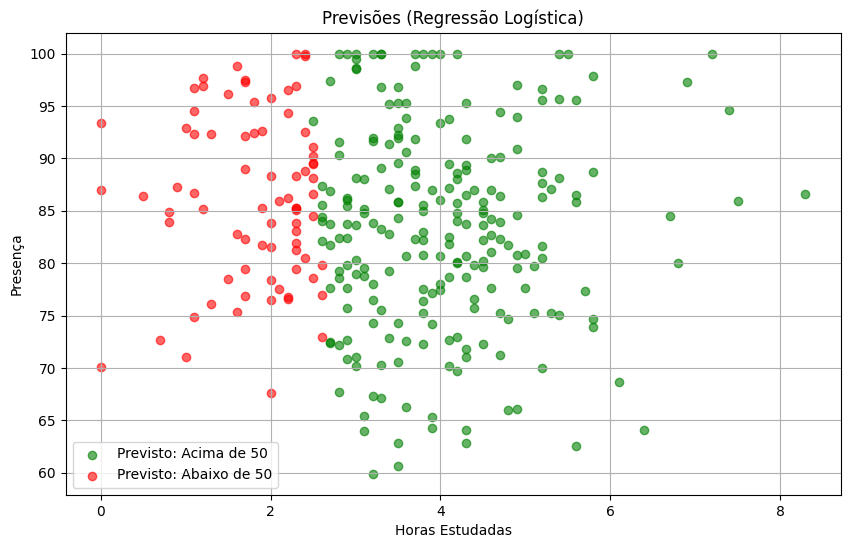

In [ ]:
#Criar variável binária
data['exam_score_acima_50'] = (data['exam_score'] > 50).astype(int)

#Verificando balanceamento
print("Distribuição das classes:")
print(data['exam_score_acima_50'].value_counts())
print("\nProporção percentual:")
print(data['exam_score_acima_50'].value_counts(normalize=True) * 100)

#Separando X e y
X = data.drop(['exam_score', 'exam_score_acima_50'], axis=1)
y = data['exam_score_acima_50']

#Dividindo os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Normalização
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

#Balanceamento dos dados com SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("\nDistribuição das classes após balanceamento (SMOTE):")
unique, counts = np.unique(y_train_bal, return_counts=True)
print(unique, counts)

#Treinando modelo Regressão Logística
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_bal, y_train_bal)

#Fazendo previsões
y_pred_lr = lr.predict(X_test_scaled)

#Avaliando modelo
print("\nAvaliação da Regressão Logística:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_lr))

#Plotando os dados do modelo
plt.figure(figsize=(10, 6))

X_vis = X_test[['study_hours_per_day', 'attendance_percentage']].values
y_pred_vis = lr.predict(scaler2.transform(X_test[['study_hours_per_day', 'attendance_percentage']]))

plt.figure(figsize=(10, 6))
plt.scatter(X_vis[y_pred_vis == 1][:, 0], X_vis[y_pred_vis == 1][:, 1], color='green', label='Previsto: Acima de 50', alpha=0.6)
plt.scatter(X_vis[y_pred_vis == 0][:, 0], X_vis[y_pred_vis == 0][:, 1], color='red', label='Previsto: Abaixo de 50', alpha=0.6)
plt.xlabel('Horas Estudadas')
plt.ylabel('Presença')
plt.title('Previsões (Regressão Logística)')
plt.legend()
plt.grid(True)
plt.show()